## Training

In [1]:
# library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

from tqdm.notebook import tqdm

# device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [2]:
# MNIST DataLoad
# transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5))
])

# dataset load
train_dataset = datasets.MNIST(root="./", train=True, download=True, transform=transform)

# dataloader
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

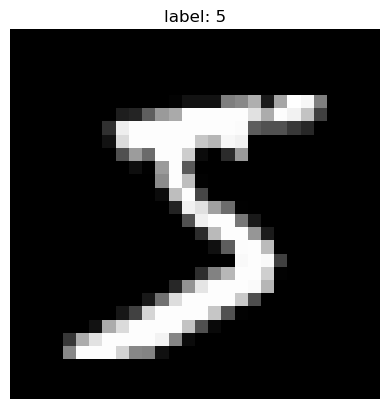

In [3]:
# sample data plotting
sample_data, sample_label = train_dataset[0]
plt.imshow(np.array(sample_data.squeeze()), cmap="gray")
plt.title(f"label: {sample_label}")
plt.axis("off")
plt.show()

In [4]:
# modeling
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # layer
        self.linear1 = nn.Linear(28 * 28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 64)
        self.linear4 = nn.Linear(64, 10)
        
        # dropout layer
        self.dropout = nn.Dropout(p=0.3)
        
        # activation layer
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
# model assign
model = Classifier().to(device)

# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# training
epochs = 30
losses_list = []

for epoch in range(epochs):
    # sum of loss
    losses = 0
    for data, label in tqdm(train_loader):
        data, label = data.to(device), label.to(device)
        
        # forward
        preds = model(data)
        loss = F.cross_entropy(preds, label)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses += loss.item()
    losses_list.append(losses)

    print(f"Epoch: {epoch}, Loss: {losses / len(train_loader)}")

  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.74413126580796


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.30645919528047916


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.22506777651734272


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.17574039764576038


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.14558502766540496


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.1265848057376126


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.10939401189275717


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.09925037969724607


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.08575757311941204


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.07826562374198841


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.0732111045459317


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 11, Loss: 0.06536065182506533


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.060320483378560864


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.05630208168305078


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.05053177430152388


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.04620957197779316


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.04488325723588972


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.04142333942828542


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.03772084268946516


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.03938728971880371


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.03284239023134618


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.031998324144821046


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.031117569595985745


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.03714307049147279


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.03166055489899749


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.028631162648168156


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.025938850859085382


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.026216632347175126


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.03196901511953418


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.021359449698416105


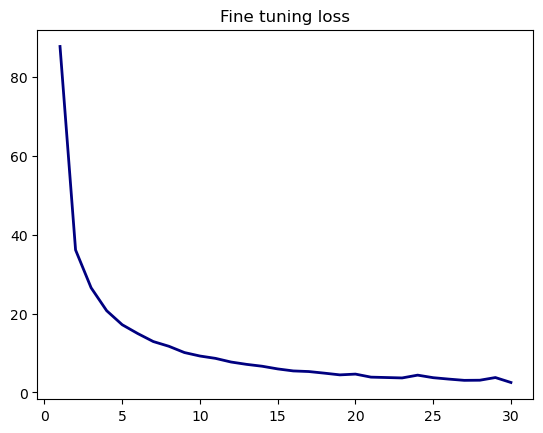

In [7]:
# train history
plt.plot(list(range(1, 31)), losses_list, color="navy", linewidth=2)
plt.title("Fine tuning loss")
plt.show()

In [8]:
# model save
torch.save(model.state_dict(), "weight.pth")

## Fine tuning

In [9]:
# model reload
model = Classifier()
model.load_state_dict(torch.load("weight.pth"))
model.to(device)

Classifier(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
)

In [10]:
# transforms
# transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5)),
])

# fine tuning dataset
finetuning_dataset = datasets.ImageFolder(root="additional_dataset/train", transform=transform)
finetuning_loader = DataLoader(finetuning_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(root="additional_dataset/valid", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [11]:
# fine tuning

# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 30
losses_list = []

for epoch in range(epochs):
    # sum of loss
    losses = 0
    for data, label in tqdm(finetuning_loader):
        data, label = data.to(device), label.to(device)
        
        # forward
        preds = model(data)
        loss = F.cross_entropy(preds, label)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses += loss.item()
    
    losses_list.append(losses)
    print(f"Epoch: {epoch}, Loss: {losses / len(train_loader)}")

# model save
torch.save(model.state_dict(), "fine_tuning.pth")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0, Loss: 2.5239741600165932


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1, Loss: 1.6225261890282066


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 2, Loss: 1.1095193563881567


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.8038879471310114


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.6600408826844167


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.5334184149564323


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.41970755336648324


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.39501855686559517


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.35090785359932203


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.3104477661140895


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.290796692593623


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11, Loss: 0.2681281066547006


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.2508585756107912


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.2292157315601737


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.20923223611661942


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.20461521158784124


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.1780987583984763


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.17520796141381992


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.16283172874127405


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.15505028427657436


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.14419603701365197


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.13304779489161606


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.13061364778017592


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.1202098189269082


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.11434735761860669


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.1096535016924648


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.10136731196258028


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.09712780052322452


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.08683193916991605


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.09048048192161624


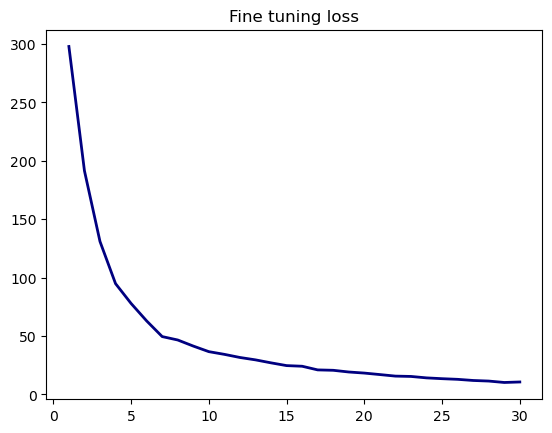

In [12]:
# fine tuning history
plt.plot(list(range(1, 31)), losses_list, color="navy", linewidth=2)
plt.title("Fine tuning loss")
plt.show()

## Evaluation

In [13]:
# testing
sumOfaccuracy = 0

for data, label in test_loader:
    data, label = data.to(device), label.to(device)
    
    # predict
    pred = model(data).argmax()
    
    if pred.item() == label.item(): sumOfaccuracy += 1

print(f"Accuracy: {sumOfaccuracy / len(test_loader)}")

Accuracy: 0.8625


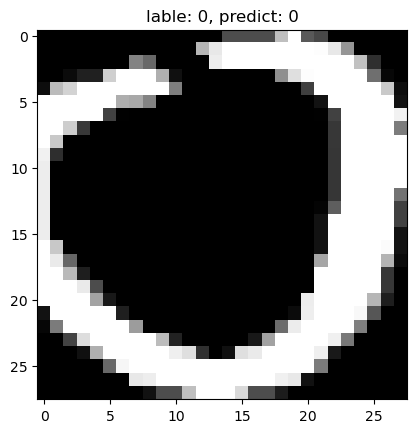

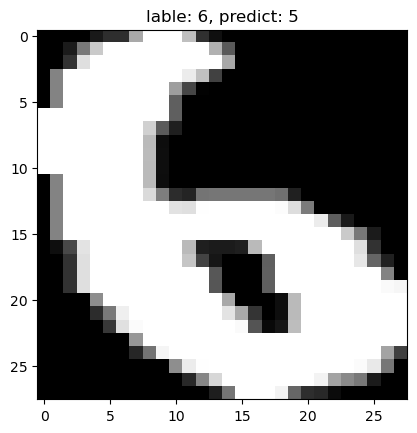

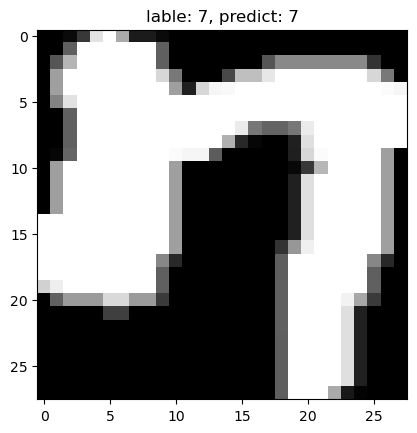

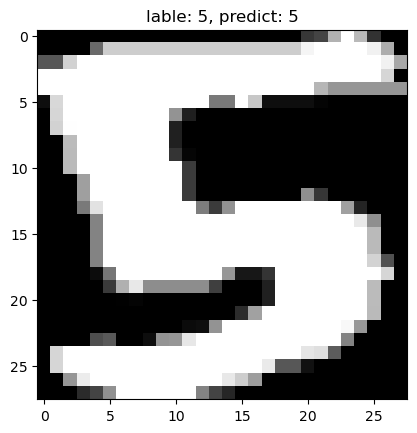

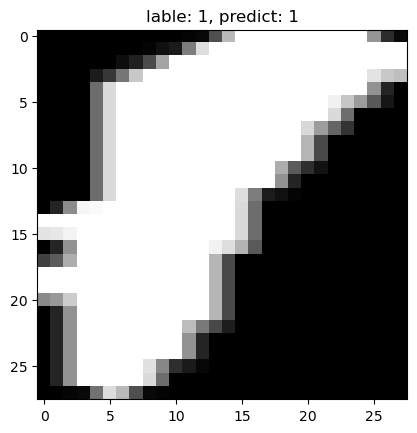

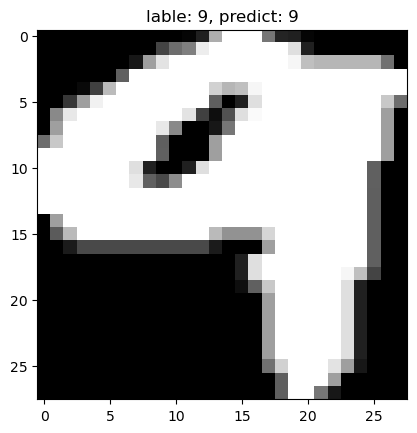

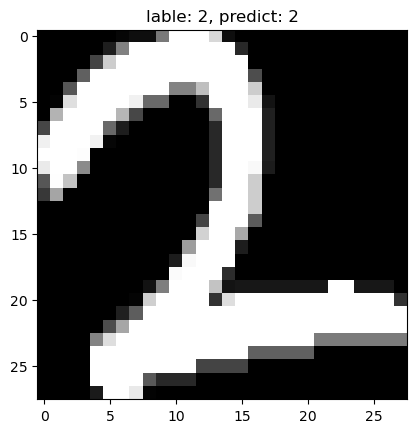

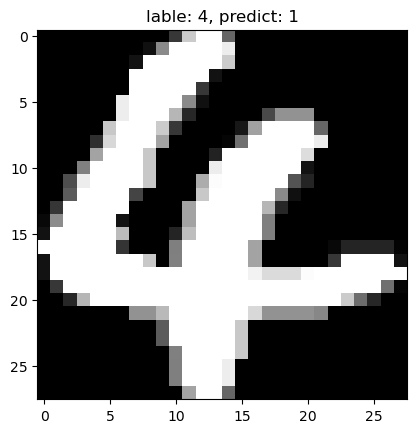

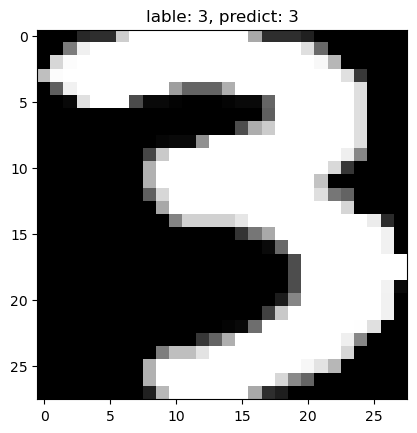

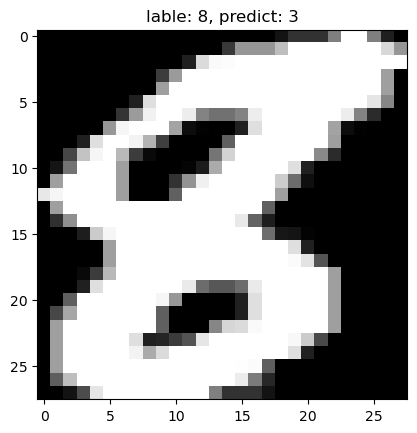

In [14]:
# plotting
# 출력 마다 달라짐. 원하는 상황으로 골라 쓰렴!
print_ls = []

for data, label in test_loader:
    data, label = data.to(device), label.to(device)
    
    # predict
    pred = model(data).argmax()
    
    if label.item() not in print_ls:
        print_ls.append(label.item())
        plt.imshow(data.squeeze().detach().cpu(), cmap="gray")
        plt.title(f"lable: {label.item()}, predict: {pred.item()}")
        plt.show()